In [251]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
import plotly.express as px


In [252]:
# import csvs
season_1617 = pd.read_csv("cleaned_bball_data/2016_17_nbaavgs.csv")
season_1718 = pd.read_csv("cleaned_bball_data/2017_18_nbaavgs.csv")
season_1819 = pd.read_csv("cleaned_bball_data/2018_19_nbaavgs.csv")
season_1920 = pd.read_csv("cleaned_bball_data/2019_20_nbaavgs.csv")
season_2021 = pd.read_csv("cleaned_bball_data/2020_21_nbaavgs.csv")
season_1920.columns
teams_2021 = pd.read_csv("teams_20_21.csv")
teams_2021.head()

,Tm
0,MIA
1,MIL
2,NOP
3,MIA
4,SAS


In [253]:
def year_cleaning(df, year):
    df['year'] = year
    df['u_player'] = df['Player'] + " " + df['year']
    df = df.drop(['year'], axis = 1)
    return df

In [254]:
season_1617 = year_cleaning(season_1617,"2017")
season_1718 = year_cleaning(season_1718,"2018")
season_1819 = year_cleaning(season_1819,"2019")
season_1920 = year_cleaning(season_1920,"2020")
season_2021 = year_cleaning(season_2021,"2021")

In [255]:
# merge df's into one df

data_frames = [season_1617, season_1718, season_1819, season_1920, season_2021]

seasons_df_merged = pd.concat(data_frames)
seasons_df_merged = seasons_df_merged.set_index('ID')
seasons_df_merged.head()

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,AST,STL,BLK,TOV,PF,PTS,PER,BPM,VORP,u_player
ID,,,,,,,,,,,,,,,,,,,,,
1,Álex Abrines,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,...,0.6,0.5,0.1,0.5,1.7,6.0,10.1,-1.6,0.1,Álex Abrines 2017
2,Quincy Acy,38,1,14.7,1.8,4.5,0.412,1.0,2.4,0.411,...,0.5,0.4,0.4,0.6,1.8,5.8,11.8,-2.1,0.0,Quincy Acy 2017
3,Steven Adams,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,...,1.1,1.1,1.0,1.8,2.4,11.3,16.5,-0.2,1.1,Steven Adams 2017
4,Arron Afflalo,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,...,1.3,0.3,0.1,0.7,1.7,8.4,8.9,-3.6,-0.7,Arron Afflalo 2017
5,Alexis Ajinça,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,...,0.3,0.5,0.6,0.8,2.0,5.3,12.9,-3.3,-0.2,Alexis Ajinça 2017


In [256]:
# make "Player" its own df

player = [seasons_df_merged["u_player"]]
player_name = pd.concat(player, axis=1)
player_name.head()

,u_player
ID,
1,Álex Abrines 2017
2,Quincy Acy 2017
3,Steven Adams 2017
4,Arron Afflalo 2017
5,Alexis Ajinça 2017


In [257]:
# create df ready for machine for advanced stats and FG % and TOV.
#The idea is to create cluster based on how efficient a player is

efficient = [seasons_df_merged["FG%"],seasons_df_merged["TOV"], seasons_df_merged["PER"],seasons_df_merged["BPM"],seasons_df_merged["VORP"]]
efficient_df = pd.concat(efficient, axis=1)
efficient_df


,FG%,TOV,PER,BPM,VORP
ID,,,,,
1,0.393,0.5,10.1,-1.6,0.1
2,0.412,0.6,11.8,-2.1,0.0
3,0.571,1.8,16.5,-0.2,1.1
4,0.440,0.7,8.9,-3.6,-0.7
5,0.500,0.8,12.9,-3.3,-0.2
...,...,...,...,...,...
2621,0.463,1.3,16.3,2.2,1.8
2622,0.559,2.0,20.3,3.3,2.2
2623,0.438,4.1,23.0,3.7,3.0


In [258]:
# scale the merged df

nba_scaled = StandardScaler().fit_transform(efficient_df)
print(nba_scaled[0:5])

[[-0.45091985 -0.73439543 -0.40671383 -0.01074125 -0.36293347]
 [-0.27835016 -0.61067653 -0.16552948 -0.08451357 -0.44506989]
 [ 1.16578569  0.87395036  0.50127431  0.19582125  0.45843075]
 [-0.02403693 -0.48695762 -0.57696161 -0.30583054 -1.02002484]
 [ 0.52092    -0.36323871 -0.00946902 -0.26156715 -0.60934273]]


In [259]:
# Initialize PCA model
pca = PCA(n_components=3)

In [260]:
# Get 3 principal components for the iris data.
nba_pca = pca.fit_transform(nba_scaled)

In [261]:
# create PCA df
df_nba_pca = pd.DataFrame(
    data = nba_pca, columns = ["principal component 1", "principal component 2", "principal component 3"], index=seasons_df_merged.index)
df_nba_pca.head()

,principal component 1,principal component 2,principal component 3
ID,,,
1,-0.818621,0.382916,0.440089
2,-0.640990,0.445982,0.250235
3,1.346180,-0.137916,-0.864820
4,-1.065277,0.620856,-0.211586
5,-0.290024,0.696375,-0.510421


In [262]:
pca.explained_variance_ratio_

array([0.58428115, 0.23036602, 0.0965006 ])

In [263]:
# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_nba_pca)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [264]:
# Initialize the K-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(df_nba_pca)

# Predict clusters
predictions = model.predict(df_nba_pca)

# Add the predicted class columns
player_name["class"] = model.labels_
player_name.head()

,u_player,class
ID,,
1,Álex Abrines 2017,4
2,Quincy Acy 2017,4
3,Steven Adams 2017,2
4,Arron Afflalo 2017,4
5,Alexis Ajinça 2017,4


In [265]:
# Player Search Bar

player_search = player_name[player_name["u_player"] == "Kenrich Williams 2021"]
player_search

,u_player,class
ID,,
2609,Kenrich Williams 2021,2


In [266]:
#sort by class

sorted_class = player_name.sort_values(["class"])
class_one = sorted_class[(sorted_class["class"] == 0)]
class_two = sorted_class[(sorted_class["class"] == 1)]
class_three = sorted_class[(sorted_class["class"] == 2)]
class_four = sorted_class[(sorted_class["class"] == 3)]
class_five = sorted_class[(sorted_class["class"] == 4)]


In [267]:
# class 1 df

df_one = pd.concat([class_one, efficient_df, seasons_df_merged["MP"]], axis=1)
class_one_df = df_one.dropna()
class_one_df.tail()

,u_player,class,FG%,TOV,PER,BPM,VORP,MP
ID,,,,,,,,
2552,Cassius Stanley 2021,0.0,0.302,0.0,5.5,-11.2,-0.2,3.9
2564,Isaiah Thomas 2021,0.0,0.333,2.0,2.4,-13.1,-0.1,16.0
2572,Anthony Tolliver 2021,0.0,0.235,0.3,4.0,-7.0,-0.1,9.0
2588,Noah Vonleh 2021,0.0,0.000,0.5,-19.0,-26.7,-0.1,2.8
2606,Greg Whittington 2021,0.0,0.000,0.0,-10.2,-17.2,0.0,3.0


In [268]:
# class 2 df

df_two = pd.concat([class_two, efficient_df, seasons_df_merged["MP"]], axis=1)
class_two_df = df_two.dropna()
class_two_df.tail()


,u_player,class,FG%,TOV,PER,BPM,VORP,MP
ID,,,,,,,,
2594,John Wall 2021,1.0,0.404,3.5,15.4,-0.7,0.4,32.2
2602,Russell Westbrook 2021,1.0,0.439,4.8,19.5,3.7,3.4,36.4
2613,Zion Williamson 2021,1.0,0.611,2.7,27.1,5.8,4.0,33.2
2622,Thaddeus Young 2021,1.0,0.559,2.0,20.3,3.3,2.2,24.3
2623,Trae Young 2021,1.0,0.438,4.1,23.0,3.7,3.0,33.7


In [269]:
# class 3 df

df_three = pd.concat([class_three, efficient_df, seasons_df_merged["MP"]], axis=1)
class_three_df = df_three.dropna()
class_three_df.tail()

,u_player,class,FG%,TOV,PER,BPM,VORP,MP
ID,,,,,,,,
2618,James Wiseman 2021,2.0,0.519,1.5,13.1,-5.0,-0.6,21.4
2619,Christian Wood 2021,2.0,0.514,2.0,20.0,1.4,1.1,32.3
2621,Delon Wright 2021,2.0,0.463,1.3,16.3,2.2,1.8,27.7
2624,Cody Zeller 2021,2.0,0.559,1.1,18.2,-0.5,0.4,20.9
2625,Ivica Zubac 2021,2.0,0.652,1.1,19.1,1.0,1.2,22.3


In [270]:
# class 4 df

df_four = pd.concat([class_four, efficient_df, seasons_df_merged["MP"]], axis=1)
class_four_df = df_four.dropna()
class_four_df.head()

,u_player,class,FG%,TOV,PER,BPM,VORP,MP
ID,,,,,,,,
830,Naz Mitrou-Long 2018,3.0,1.0,0.0,133.8,242.2,0.0,1.0


In [271]:
# class 5 df

df_five = pd.concat([class_five, efficient_df, seasons_df_merged["MP"]], axis=1)
class_five_df = df_five.dropna()
class_five_df.head()

,u_player,class,FG%,TOV,PER,BPM,VORP,MP
ID,,,,,,,,
1,Álex Abrines 2017,4.0,0.393,0.5,10.1,-1.6,0.1,15.5
2,Quincy Acy 2017,4.0,0.412,0.6,11.8,-2.1,0.0,14.7
4,Arron Afflalo 2017,4.0,0.440,0.7,8.9,-3.6,-0.7,25.9
5,Alexis Ajinça 2017,4.0,0.500,0.8,12.9,-3.3,-0.2,15.0
6,Cole Aldrich 2017,4.0,0.523,0.3,12.7,-0.8,0.2,8.6


In [272]:
def get_clusters(k, data):
    # Create a copy of the DataFrame
    data = data.copy()

    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [273]:
# Attempting to get an offensive group ranking
eff_player = season_1920[["PER","VORP","BPM"]]

In [274]:
five_clusters = get_clusters(5, eff_player)

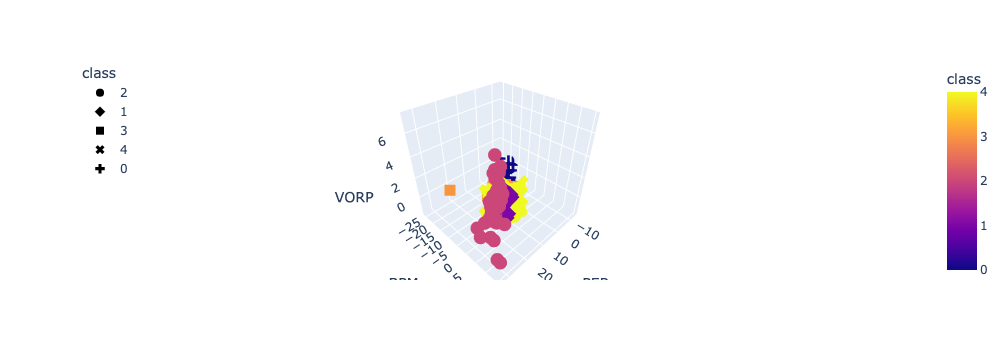

In [284]:
# Plot the 3D-scatter with x="Annual Income", y="Spending Score (1-100)" and z="Age"


fig = px.scatter_3d(
    five_clusters,
    x="PER",
    y="BPM",
    z="VORP",
    color="class",
    symbol="class",
    width=1000,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

Creating DF's for most recent seasons split by class

In [285]:
# Adding a new DF to show last seasons data by class
df_new = pd.DataFrame(index=season_2021.index)
df_new = pd.concat([season_2021, player_name["class"], teams_2021], axis=1)
recent_season_class = df_new.dropna()
#recent_season_class(index=df_new.index)
recent_season_class.set_index('ID')
recent_season_class.head(50)



,ID,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,...,BLK,TOV,PF,PTS,PER,BPM,VORP,u_player,class,Tm
1,2087.0,Jaylen Adams,7.0,0.0,2.6,0.1,1.1,0.125,0.0,0.3,...,0.0,0.0,0.1,0.3,-6.5,-19.8,-0.1,Jaylen Adams 2021,4.0,MIL
2,2088.0,Steven Adams,58.0,58.0,27.7,3.3,5.3,0.614,0.0,0.1,...,0.7,1.3,1.9,7.6,15.1,-0.3,0.7,Steven Adams 2021,4.0,NOP
3,2089.0,Bam Adebayo,64.0,64.0,33.5,7.1,12.5,0.570,0.0,0.1,...,1.0,2.6,2.3,18.7,22.7,4.9,3.7,Bam Adebayo 2021,2.0,MIA
4,2090.0,LaMarcus Aldridge,26.0,23.0,25.9,5.4,11.4,0.473,1.2,3.1,...,1.1,1.0,1.8,13.5,15.7,-0.3,0.3,LaMarcus Aldridge 2021,4.0,SAS
5,2091.0,Ty-Shon Alexander,15.0,0.0,3.1,0.2,0.8,0.250,0.1,0.6,...,0.1,0.2,0.1,0.6,4.2,-6.5,-0.1,Ty-Shon Alexander 2021,4.0,PHO
6,2092.0,Nickeil Alexander-Walker,46.0,13.0,21.9,4.2,10.0,0.419,1.7,4.8,...,0.5,1.5,1.9,11.0,12.5,-1.3,0.2,Nickeil Alexander-Walker 2021,4.0,NOP
7,2093.0,Grayson Allen,50.0,38.0,25.2,3.5,8.3,0.418,2.1,5.5,...,0.2,1.0,1.4,10.6,12.8,-0.2,0.6,Grayson Allen 2021,2.0,MEM
8,2094.0,Jarrett Allen,63.0,45.0,29.6,4.7,7.7,0.618,0.1,0.3,...,1.4,1.6,1.5,12.8,20.1,1.1,1.4,Jarrett Allen 2021,4.0,TOT
9,2095.0,Al-Farouq Aminu,23.0,14.0,18.9,1.7,4.3,0.384,0.3,1.6,...,0.4,1.2,1.3,4.4,8.9,-3.8,-0.2,Al-Farouq Aminu 2021,2.0,ORL
10,2096.0,Kyle Anderson,69.0,69.0,27.3,4.5,9.5,0.468,1.4,3.8,...,0.8,1.2,1.7,12.4,17.2,3.3,2.5,Kyle Anderson 2021,4.0,MEM


In [286]:
# Player Search Bar

player_search_new = recent_season_class[recent_season_class["Player"] == "LeBron James"]
player_search_new

,ID,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,...,BLK,TOV,PF,PTS,PER,BPM,VORP,u_player,class,Tm
251,2337.0,LeBron James,45.0,45.0,33.4,9.4,18.3,0.513,2.3,6.3,...,0.6,3.7,1.6,25.0,24.2,8.1,3.8,LeBron James 2021,2.0,TOT


In [287]:
class_one_new = recent_season_class[(recent_season_class["class"] == 0)]
class_two_new = recent_season_class[(recent_season_class["class"] == 1)]
class_three_new = recent_season_class[(recent_season_class["class"] == 2)]
class_five_new = recent_season_class[(recent_season_class["class"] == 4)]

In [288]:
class_five_new.head(50)

,ID,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,...,BLK,TOV,PF,PTS,PER,BPM,VORP,u_player,class,Tm
1,2087.0,Jaylen Adams,7.0,0.0,2.6,0.1,1.1,0.125,0.0,0.3,...,0.0,0.0,0.1,0.3,-6.5,-19.8,-0.1,Jaylen Adams 2021,4.0,MIL
2,2088.0,Steven Adams,58.0,58.0,27.7,3.3,5.3,0.614,0.0,0.1,...,0.7,1.3,1.9,7.6,15.1,-0.3,0.7,Steven Adams 2021,4.0,NOP
4,2090.0,LaMarcus Aldridge,26.0,23.0,25.9,5.4,11.4,0.473,1.2,3.1,...,1.1,1.0,1.8,13.5,15.7,-0.3,0.3,LaMarcus Aldridge 2021,4.0,SAS
5,2091.0,Ty-Shon Alexander,15.0,0.0,3.1,0.2,0.8,0.250,0.1,0.6,...,0.1,0.2,0.1,0.6,4.2,-6.5,-0.1,Ty-Shon Alexander 2021,4.0,PHO
6,2092.0,Nickeil Alexander-Walker,46.0,13.0,21.9,4.2,10.0,0.419,1.7,4.8,...,0.5,1.5,1.9,11.0,12.5,-1.3,0.2,Nickeil Alexander-Walker 2021,4.0,NOP
8,2094.0,Jarrett Allen,63.0,45.0,29.6,4.7,7.7,0.618,0.1,0.3,...,1.4,1.6,1.5,12.8,20.1,1.1,1.4,Jarrett Allen 2021,4.0,TOT
10,2096.0,Kyle Anderson,69.0,69.0,27.3,4.5,9.5,0.468,1.4,3.8,...,0.8,1.2,1.7,12.4,17.2,3.3,2.5,Kyle Anderson 2021,4.0,MEM
11,2097.0,Giannis Antetokounmpo,61.0,61.0,33.0,10.3,18.0,0.569,1.1,3.6,...,1.2,3.4,2.8,28.1,29.2,9.0,5.6,Giannis Antetokounmpo 2021,4.0,MIL
12,2098.0,Kostas Antetokounmpo,15.0,0.0,3.7,0.2,0.7,0.300,0.0,0.0,...,0.3,0.7,0.5,0.8,0.0,-12.6,-0.1,Kostas Antetokounmpo 2021,4.0,LAL
13,2099.0,Thanasis Antetokounmpo,57.0,3.0,9.7,1.2,2.4,0.489,0.1,0.5,...,0.2,0.8,1.3,2.9,10.3,-3.5,-0.2,Thanasis Antetokounmpo 2021,4.0,MIL


In [249]:
# Sort by team bar

sorted_team = recent_season_class.sort_values(["class"])
team = sorted_team[(sorted_team["Tm"] == "LAL")]
team.head(15)


,ID,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,...,STL,BLK,TOV,PF,PTS,PER,BPM,VORP,class,Tm
182,2268.0,Eric Gordon,27.0,13.0,29.2,5.9,13.6,0.433,2.6,7.8,...,0.5,0.5,1.9,1.6,17.8,14.4,-1.1,0.2,0.0,LAL
206,2292.0,Joe Harris,69.0,65.0,31.0,5.2,10.2,0.505,3.1,6.4,...,0.7,0.2,0.9,2.0,14.1,14.1,0.4,1.3,1.0,LAL
288,2374.0,Jalen Lecque,4.0,0.0,3.0,0.3,2.3,0.111,0.0,0.3,...,0.0,0.0,0.0,0.0,1.3,4.7,-13.0,0.0,1.0,LAL
299,2385.0,Brook Lopez,70.0,70.0,27.2,4.6,9.1,0.503,1.4,4.0,...,0.6,1.5,0.9,2.1,12.3,15.4,0.0,0.9,2.0,LAL
252,2338.0,Mike James,13.0,1.0,18.2,2.6,7.1,0.370,0.8,2.4,...,0.5,0.1,1.5,0.8,7.7,11.9,-4.4,-0.1,2.0,LAL
318,2404.0,Kelan Martin,35.0,0.0,9.2,1.8,3.9,0.449,0.7,1.7,...,0.3,0.3,0.5,1.0,4.5,13.9,-2.4,0.0,4.0,LAL
401,2487.0,Theo Pinson,17.0,0.0,2.0,0.1,0.5,0.111,0.0,0.5,...,0.0,0.0,0.1,0.2,0.1,-8.1,-15.7,-0.1,4.0,LAL
99,2185.0,Gary Clark,39.0,11.0,16.8,1.0,3.4,0.303,0.8,2.8,...,0.3,0.2,0.4,0.9,3.1,6.0,-4.9,-0.5,4.0,LAL
88,2174.0,Vlatko Čančar,41.0,1.0,6.9,0.8,1.8,0.458,0.2,0.8,...,0.3,0.0,0.3,0.4,2.1,9.7,-2.6,0.0,4.0,LAL
80,2166.0,Reggie Bullock,65.0,64.0,30.0,3.8,8.6,0.442,2.5,6.1,...,0.8,0.2,0.7,2.2,10.9,11.1,-0.1,0.9,4.0,LAL
